### Pandas ###
- Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- There are to imporatnt objects in Pandas (Series and Dataframe)

#### Pandas Series ####
A Pandas Series is like a column in a table. It is a 1-D array holding data on any type.

In [108]:
# importing pandas
import numpy as np # since pandas is based on numpy(recomended not necessary)
import pandas as pd

##### Series from Lists

In [109]:
# strings
country = ["India", "Japan", "USA", "Australia", "Korea"]
pd.Series(country)

# pandas in 99% percent case consider string dtype as object 

0        India
1        Japan
2          USA
3    Australia
4        Korea
dtype: object

In [110]:
runs =[12, 30, 48, 52, 80]
runs_series = pd.Series(runs)
print(runs_series)

0    12
1    30
2    48
3    52
4    80
dtype: int64


In [111]:
# custom index and setting a series name
marks = [67, 57, 89, 100]
subjects = ["maths", "english", "science", "hindi"]

pd.Series(marks, index=subjects, name="my marks")

maths       67
english     57
science     89
hindi      100
Name: my marks, dtype: int64

##### Series with Dictionary

In [112]:
marks_dict = {"maths" : 67,
              "english" : 57,
              "science" : 89,
              "hindi" : 100}

marks_series = pd.Series(marks_dict, name="my marks")
print(marks_series)

maths       67
english     57
science     89
hindi      100
Name: my marks, dtype: int64


##### Series Attributes 

In [113]:
# size
print(marks_series.size)

# dtype
print(marks_series.dtype)

# name
print(marks_series.name)

# is_unique
print(marks_series.is_unique) # all items are different -> True

# index
print(marks_series.index) # returns Index object
print(runs_series.index) # returns RangeIndex object

# values
print(marks_series.values) # returns a numpy array with values

4
int64
my marks
True
Index(['maths', 'english', 'science', 'hindi'], dtype='object')
RangeIndex(start=0, stop=5, step=1)
[ 67  57  89 100]


##### Series using read_csv

In [114]:
# with one col
subs_data = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Datasets_Pandas\subs.csv")
print(type(subs_data))
# this is a dataframe
# to make it series use squeeze method

subs_series = subs_data.squeeze()
print(subs_series)
print(type(subs_series))
# name is directly set from the column heading

<class 'pandas.core.frame.DataFrame'>
0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64
<class 'pandas.core.series.Series'>


In [115]:
# csvwith two colums
# want to use one column as index
kohli_data = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Datasets_Pandas\kohli_ipl.csv", index_col="match_no")

kohli_series = kohli_data.squeeze()
print(kohli_series) 
# OR
print(kohli_data["runs"])

# do not want to use one column as index
kohli_data = pd.read_csv(r"C:\Users\utkarsh.alpuria\Desktop\My Work\Python\Python ML\Python ML Algorithm\Datasets_Pandas\kohli_ipl.csv")
 
print(kohli_data["runs"])

match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64
match_no
1       1
2      23
3      13
4      12
5       1
       ..
211     0
212    20
213    73
214    25
215     7
Name: runs, Length: 215, dtype: int64
0       1
1      23
2      13
3      12
4       1
       ..
210     0
211    20
212    73
213    25
214     7
Name: runs, Length: 215, dtype: int64


In [116]:
bolly_data = pd.read_csv(r"Datasets_Pandas\bollywood.csv", index_col="movie")
bolly_series = bolly_data.squeeze()
print(bolly_series)
print(type(bolly_series))

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object
<class 'pandas.core.series.Series'>


##### Series Methods

In [155]:
# head and tail
print(subs_series.head(3)) # default is 5 rows
print(subs_series.tail(3)) # default is 5 rows

# sample 
print(bolly_series.sample(5)) # default pick one row randomly

# value_counts -> gives frequency of values
print(bolly_series.value_counts()) # returns how many time a value appear in data in decending order

# sort_values
print(kohli_series.sort_values()) # sorts value in ascending order
print(kohli_series.sort_values(ascending=False)) # sorts value in descending order

# find highest runs by kohli
print(kohli_series.sort_values(ascending=False).head(1).values[0])

# sort_values -> inplace -> inplace = True (sort and change the original series)
# kohli_series.sort_values(inplace=False)

# sort_index
print(bolly_series.sort_index())
# ascending=False id valid
# inplace=True is valid for this too

# apply
print(bolly_series.apply(lambda x : "Khan" in x)) # applies lambda function on each item of series

0    48
1    57
2    40
Name: Subscribers gained, dtype: int64
362    155
363    144
364    172
Name: Subscribers gained, dtype: int64
movie
Yeh Hai Bakrapur             Anshuman Jha
Hungama (2003 film)        Akshaye Khanna
Hum Chaar                     Prit Kamani
Bewakoofiyaan          Ayushmann Khurrana
Shikhar (film)                 Ajay Devgn
Name: lead, dtype: object
lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64
match_no
206      0
211      0
207      0
93       0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64
match_no
128    113
126    109
123    108
120    100
164    100
      ... 
93       0
135      0
211      0
8        0
130      0
Name: runs, Length: 215, dty

##### Series Maths Methods

In [118]:
# count(this doedn't count the missing value(nan) size also counts the missing value)
print(kohli_series.count())

# sum, product
total_subs = subs_series.sum()
print(total_subs)
print(subs_series.product()) # gives zero becoz series have value 0 present or the product sis very big

# mean, median, mode, std, var
print(subs_series.mean()) # average
print(subs_series.median()) 
print(bolly_series.mode()) # value that comes maximum times in data
print(subs_series.std())
print(subs_series.var())

# min/max
print(subs_series.max(), subs_series.min())

# describe
print(kohli_series.describe())

215
49510
0
135.64383561643837
123.0
0    Akshay Kumar
Name: lead, dtype: object
62.6750230372527
3928.1585127201565
396 33
count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64


##### Series Indexig

In [119]:
# integer indexing
x = pd.Series([12,13,35,14,46,79,57,58,9])
print(x[4])
print(bolly_series["Uri: The Surgical Strike"])
print(bolly_series[0])

# negative indexing
# print(x[-1]) # does not work if index is int
print(bolly_series[-1]) # works if index is string

# slicing
print(kohli_series[5:16])
print(kohli_series[5:20:3])
#print(bolly_series["Company (film) ":]) # doesn't works

# negative index slicing
print(kohli_series[-5:]) # works
print(bolly_series[-5:]) # works

# fancy indexing
print(kohli_series[[1,3,6,7,9]])

46
Vicky Kaushal
Vicky Kaushal
Akshay Kumar
match_no
6      9
7     34
8      0
9     21
10     3
11    10
12    38
13     3
14    11
15    50
16     2
Name: runs, dtype: int64
match_no
6      9
9     21
12    38
15    50
18    19
Name: runs, dtype: int64
match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64
movie
Hum Tumhare Hain Sanam      Shah Rukh Khan
Aankhen (2002 film)       Amitabh Bachchan
Saathiya (film)               Vivek Oberoi
Company (film)                  Ajay Devgn
Awara Paagal Deewana          Akshay Kumar
Name: lead, dtype: object
match_no
1     1
3    13
6     9
7    34
9    21
Name: runs, dtype: int64


C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_25308\226312359.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(bolly_series[0])
C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_25308\226312359.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(bolly_series[-1]) # works if index is string


##### Editing Series

In [120]:
# using indexing
marks_series["english"] = 100
print(marks_series)

marks_series["sst"] = 89 # adds new item
print(marks_series)

# multiple item edit
kohli_series[0:4] = [50, 50, 50, 50] # can also gige step ad fancy indexing
print(kohli_series.head(5))


maths       67
english    100
science     89
hindi      100
Name: my marks, dtype: int64
maths       67
english    100
science     89
hindi      100
sst         89
Name: my marks, dtype: int64
match_no
1    50
2    50
3    50
4    50
5     1
Name: runs, dtype: int64


##### Series with pyhton Functionalities

In [121]:
# len,type,dir,sorted,max,min
print(len(subs_series)) # give length
print(type(subs_series)) # give type
print(dir(subs_series)) # give all attributes and methods of series
print(sorted(subs_series)) # return sorted list(not np.array) series
print(max(subs_series))
print(min(subs_series))

# type conversion
print(list(marks_series))
print(dict(marks_series))

# membership operator(in operator) -> works on index
print("2 States (2014 film)" in bolly_series)
# to make it work on values
print("Hrithik Roshan" in bolly_series.values) 

# looping
for val in marks_series: # loops runs on values
    print(val)
# to for on index
for i in marks_series.index:
    print(i)

# Operators 
# arithmetic operators
print(marks_series + 100) # concept of broadcasting is used

# relational operators
print(marks_series >= 90) # you can use this series as a map to filter another series

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

##### Boolean Indexing on Series

In [122]:
# find all subjects with marks greater than 90
print(marks_series[(marks_series >= 90)])

# find total matches with 0 runs by kohli
print(kohli_series[kohli_series == 0].size)

# find total days with more that 200 subs gain
print(subs_series[subs_series > 200].size)

# find actors how have made more than 25 movies
actors_movie_count = bolly_series.value_counts()
actors_with_25plus = actors_movie_count > 25
actors_25_plus_names = actors_movie_count[actors_with_25plus]
print(actors_25_plus_names)
# OR
print(bolly_series.value_counts()[bolly_series.value_counts() > 25])

english    100
hindi      100
Name: my marks, dtype: int64
9
59
lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Name: count, dtype: int64
lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Name: count, dtype: int64


##### Plotting Graps on Series

<Axes: >

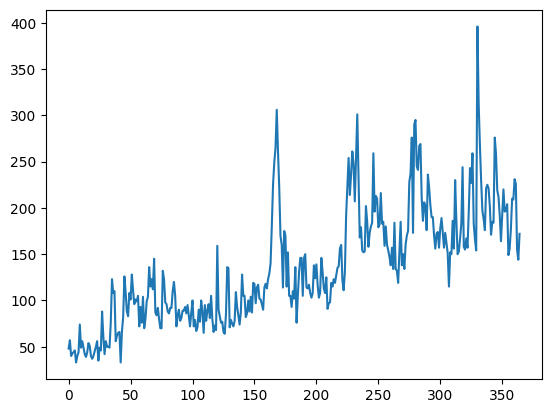

In [123]:
subs_series.plot()

<Axes: xlabel='lead'>

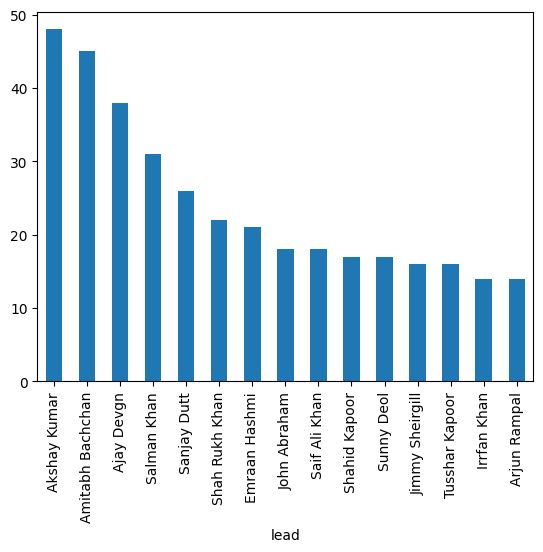

In [124]:
bolly_series.value_counts().head(15).plot(kind="bar")

<Axes: ylabel='count'>

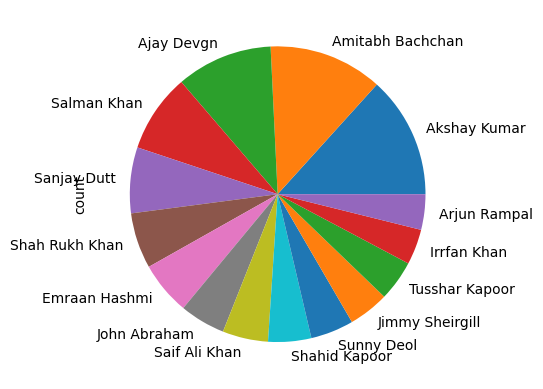

In [125]:
bolly_series.value_counts().head(15).plot(kind="pie")

#### DataFrame
- 2D structure of data consisting of rows and colums.
- A single column or row in DataFrame is a Series.

In [126]:
import numpy as np
import pandas as pd

##### Creating DataFrame

In [127]:
# using lists
student_data = [ 
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,50,2]
] #[iq, marks, ctc]

students = pd.DataFrame(student_data, columns=["iq", "marks", "package"])
students

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,50,2


In [128]:
# using dicts

student_dict = {
    "iq":[100,90,120,80],
    "marks":[80,70,100,50],
    "package":[10,7,14,2]
}

students = pd.DataFrame(student_dict)
students

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,50,2


In [129]:
# using read_csv
movies = pd.read_csv(r"Datasets_Pandas\movies.csv")
movies

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)


In [130]:
ipl = pd.read_csv(r"Datasets_Pandas\ipl-matches.csv")
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


##### DataFrame Attributes and Methods

In [131]:
# Attributes
# shape
print(movies.shape)

# dtypes
print(movies.dtypes) # gives a series with all coumn title as index and dtype as value

# index
print(movies.index)

# columns
print(movies.columns)

# values
print(students.values)

(1629, 18)
title_x              object
imdb_id              object
poster_path          object
wiki_link            object
title_y              object
original_title       object
is_adult              int64
year_of_release       int64
runtime              object
genres               object
imdb_rating         float64
imdb_votes            int64
story                object
summary              object
tagline              object
actors               object
wins_nominations     object
release_date         object
dtype: object
RangeIndex(start=0, stop=1629, step=1)
Index(['title_x', 'imdb_id', 'poster_path', 'wiki_link', 'title_y',
       'original_title', 'is_adult', 'year_of_release', 'runtime', 'genres',
       'imdb_rating', 'imdb_votes', 'story', 'summary', 'tagline', 'actors',
       'wins_nominations', 'release_date'],
      dtype='object')
[[100  80  10]
 [ 90  70   7]
 [120 100  14]
 [ 80  50   2]]


In [132]:
# Methods
# head
movies.head(3) # default is 5 items
# similarly tail

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)


In [133]:
# sample -> random picks
movies.sample(3)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
225,Patel Ki Punjabi Shaadi,tt3209826,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Patel_Ki_Punjabi...,Patel Ki Punjabi Shaadi,Patel Ki Punjabi Shaadi,0,2017,120,Comedy,3.9,276,Comedy movie is about a Punjabi and Gujarati f...,Comedy movie is about a Punjabi and Gujarati f...,NaN,Rishi Kapoor|Paresh Rawal|Vir Das|Payal Ghosh|...,NaN,15 September 2017 (USA)
957,What's Your Raashee?,tt1242530,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/What%27s_Your_Ra...,What's Your Raashee?,What's Your Raashee?,0,2009,195,Comedy|Drama|Romance,4.6,2417,What's Your Raashee? Yogesh Patel a young man...,A young man has only ten days to locate his so...,NaN,Harman Baweja|Priyanka Chopra|Anjan Srivastav|...,1 nomination,2 October 2009 (USA)
1529,Kehtaa Hai Dil Baar Baar,tt0322936,https://upload.wikimedia.org/wikipedia/en/d/da...,https://en.wikipedia.org/wiki/Kehtaa_Hai_Dil_B...,Kehtaa Hai Dil Baar Baar,Kehtaa Hai Dil Baar Baar,0,2002,119,Comedy|Drama|Romance,4.7,171,Ranshod Rai Patel is an egotistical and arroga...,An egoistic and overprotective father tests h...,The first 35mm color Hindi feature film shot e...,Paresh Rawal|Jimmy Sheirgill|Kim Sharma|Johnny...,NaN,15 November 2002 (USA)


In [134]:
# info -> gives summary on titles, non nan values, dtype, data memory in ram
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title_x           1629 non-null   object 
 1   imdb_id           1629 non-null   object 
 2   poster_path       1526 non-null   object 
 3   wiki_link         1629 non-null   object 
 4   title_y           1629 non-null   object 
 5   original_title    1629 non-null   object 
 6   is_adult          1629 non-null   int64  
 7   year_of_release   1629 non-null   int64  
 8   runtime           1629 non-null   object 
 9   genres            1629 non-null   object 
 10  imdb_rating       1629 non-null   float64
 11  imdb_votes        1629 non-null   int64  
 12  story             1609 non-null   object 
 13  summary           1629 non-null   object 
 14  tagline           557 non-null    object 
 15  actors            1624 non-null   object 
 16  wins_nominations  707 non-null    object 


In [135]:
# describe
# automatically detects the numeric columns and give mathematical summary
movies.describe()

,is_adult,year_of_release,imdb_rating,imdb_votes
count,1629.0,1629.000000,1629.000000,1629.000000
mean,0.0,2010.263966,5.557459,5384.263352
std,0.0,5.381542,1.567609,14552.103231
min,0.0,2001.000000,0.000000,0.000000
25%,0.0,2005.000000,4.400000,233.000000
50%,0.0,2011.000000,5.600000,1000.000000
75%,0.0,2015.000000,6.800000,4287.000000
max,0.0,2019.000000,9.400000,310481.000000


In [136]:
# isnull -> checks for every column is there a nan value
movies.isnull()
# True -> there is a missing value
# False -> there is not a missing value

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1624,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1626,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True
1627,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [137]:
movies.isnull().sum() # addas all the true(1) and false(0) for every colums
# thus we hve no. of missing value for every column

title_x                0
imdb_id                0
poster_path          103
wiki_link              0
title_y                0
original_title         0
is_adult               0
year_of_release        0
runtime                0
genres                 0
imdb_rating            0
imdb_votes             0
story                 20
summary                0
tagline             1072
actors                 5
wins_nominations     922
release_date         107
dtype: int64

In [138]:
# duplicated
print(movies.duplicated()) # return flase if the row in not duplicate and True if the row is duplicated
print(movies.duplicated().sum()) # gives 0 becoz no dumlicate row is present in movies

0       False
1       False
2       False
3       False
4       False
        ...  
1624    False
1625    False
1626    False
1627    False
1628    False
Length: 1629, dtype: bool
0


In [139]:
# rename -> rename column of dataframe
renamed = students.rename(columns={"marks":"percentage", "package":"lpa"})
print(renamed)
# this does not change the original dataframe
print(students)
# to make change in original df use inplace = True
students.rename(columns={"marks":"percentage", "package":"lpa"}, inplace=True)
print(students)

    iq  percentage  lpa
0  100          80   10
1   90          70    7
2  120         100   14
3   80          50    2
    iq  marks  package
0  100     80       10
1   90     70        7
2  120    100       14
3   80     50        2
    iq  percentage  lpa
0  100          80   10
1   90          70    7
2  120         100   14
3   80          50    2


##### Math Methods

In [140]:
# sum
# gives sum of all the columns(if column has string it is concanated)
print(students.sum()) 

# for row wise sum
print(students.sum(axis=1))

# axis argument is valid for other math methods also like(mean, min, max, median, std, var)

iq            390
percentage    300
lpa            33
dtype: int64
0    190
1    167
2    234
3    132
dtype: int64


##### Selecting columns from DataFrame

In [141]:
# single column fetch
print(movies["title_x"]) # this gives a series of movie title column
print(type(movies["title_x"]))

# multiple column fetch
print(movies[["title_x", "year_of_release", "runtime"]]) # this is a dataframe. Also, the order of data is same as the list you provide
print(type(movies[["title_x", "year_of_release", "runtime"]]))

0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
1624                   Tera Mera Saath Rahen
1625                    Yeh Zindagi Ka Safar
1626                         Sabse Bada Sukh
1627                                   Daaka
1628                                Humsafar
Name: title_x, Length: 1629, dtype: object
<class 'pandas.core.series.Series'>
                                   title_x  year_of_release runtime
0                 Uri: The Surgical Strike             2019     138
1                            Battalion 609             2019     131
2     The Accidental Prime Minister (film)             2019     112
3                          Why Cheat India             2019     121
4                          Evening Shadows             2018     102
...               

##### Selecting rows from DataFrame
- **iloc** - searches using index positios
- **loc** - searches using index labels

In [142]:
# ILOC
# single row fetch
print(movies.iloc[0]) # gives index 0 item of every column
# this row is a pandas series
print(type(movies.iloc[0]))

title_x                                      Uri: The Surgical Strike
imdb_id                                                     tt8291224
poster_path         https://upload.wikimedia.org/wikipedia/en/thum...
wiki_link           https://en.wikipedia.org/wiki/Uri:_The_Surgica...
title_y                                      Uri: The Surgical Strike
original_title                               Uri: The Surgical Strike
is_adult                                                            0
year_of_release                                                  2019
runtime                                                           138
genres                                               Action|Drama|War
imdb_rating                                                       8.4
imdb_votes                                                      35112
story               Divided over five chapters  the film chronicle...
summary             Indian army special forces execute a covert op...
tagline             

In [143]:
# multiple row fetch
movies.iloc[0:5] # returns first five rows in dataframe
# step parameter also work
# same as slicing
# can also use fancy indexing
# movies.iloc[[2,6,9]]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [144]:
# LOC -> search by index label
student_dict = {
    "iq":[100,90,120,80],
    "marks":[80,70,100,50],
    "package":[10,7,14,2]
}

students = pd.DataFrame(student_dict, index=["abhishek", "sumit", "utkarsh", "nikhil"])
students

,iq,marks,package
abhishek,100,80,10
sumit,90,70,7
utkarsh,120,100,14
nikhil,80,50,2


In [145]:
print(students.loc["abhishek"])

# slicing(start included : end included : step)
print(students.loc["abhishek" : "utkarsh"])

# fancy indexing
print(students.loc[["abhishek","sumit","nikhil"]])

iq         100
marks       80
package     10
Name: abhishek, dtype: int64
           iq  marks  package
abhishek  100     80       10
sumit      90     70        7
utkarsh   120    100       14
           iq  marks  package
abhishek  100     80       10
sumit      90     70        7
nikhil     80     50        2


##### Selecting both rows and column

In [146]:
# dataframe.iloc[start row index:end row index, start col index:end col index] 

movies.iloc[0:4, 0:3]

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...


In [147]:
# dataframe.loc[start row label:end row label, start col label:end col label] 

movies.loc[0:3, "title_x":"poster_path"]

,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...


##### Filtering DataFrame

In [148]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [149]:
# find all the final winners(winner at end of every ipl)

# finding all the final matches
final_match_mask = ipl["MatchNumber"] == "Final"
final_matches = ipl[final_match_mask]
# finding all the final winners
season_winners = final_matches[["WinningTeam", "Season"]]
season_winners

# OR 
# ipl[ipl["MatchNumber"] == "Final"][["WinningTeam", "Season"]]

,WinningTeam,Season
0,Gujarat Titans,2022
74,Chennai Super Kings,2021
134,Mumbai Indians,2020/21
194,Mumbai Indians,2019
254,Chennai Super Kings,2018
314,Mumbai Indians,2017
373,Sunrisers Hyderabad,2016
433,Mumbai Indians,2015
492,Kolkata Knight Riders,2014
552,Mumbai Indians,2013


In [150]:
# how many super over finishes have occured 

# superover happens when both team make equal runs
ipl[ipl["SuperOver"] == "Y"].shape[0]

14

In [151]:
# how many matches has csk won in kolkata

(ipl[ipl["WinningTeam"] == "Chennai Super Kings"]["City"] == "Kolkata").sum()

# OR

# (ipl[(ipl["City"] == "Kolkata") & (ipl["WinningTeam"] == "Chennai Super Kings")]).shape[0]

5

In [152]:
# toss winner is match winner in percentage

(ipl[ipl["WinningTeam"] == ipl["TossWinner"]].shape[0] / ipl.shape[0])*100

51.473684210526315

In [153]:
# movies with rating higher than 8.3 and votes>70000

movies[(movies["imdb_rating"] > 8.3) & (movies["imdb_votes"] > 70000)]

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
354,Dangal (film),tt5074352,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Dangal_(film),Dangal,Dangal,0,2016,161,Action|Biography|Drama,8.4,131338,Biopic of Mahavir Singh Phogat who taught wre...,Former wrestler Mahavir Singh Phogat and his t...,You think our girls are any lesser than boys?,Aamir Khan|Fatima Sana Shaikh|Sanya Malhotra|S...,23 wins & 4 nominations,21 December 2016 (USA)
912,3 Idiots,tt1187043,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/3_Idiots,3 Idiots,3 Idiots,0,2009,170,Comedy|Drama,8.4,310481,Farhan Qureshi and Raju Rastogi want to re-uni...,Two friends are searching for their long lost ...,Don't be Stupid. Be an I.D.I.O.T.,Aamir Khan|Madhavan|Sharman Joshi|Kareena Kapo...,57 wins & 18 nominations,25 December 2009 (India)
1127,Taare Zameen Par,tt0986264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Taare_Zameen_Par,Like Stars on Earth,Taare Zameen Par,0,2007,165,Drama|Family,8.4,148498,Ishaan Awasthi is an eight-year-old child whos...,An eight-year-old boy is thought to be a lazy ...,Every Child is Special,Darsheel Safary|Aamir Khan|Tisca Chopra|Vipin ...,18 wins & 8 nominations,21 December 2007 (India)


In [157]:
# Action movies with rating higher than 8
mask1 = movies["genres"].apply(lambda x: "Action" in x) # movies with Action in genres
mask2 = movies["imdb_rating"] > 8

movies[mask1 & mask2]

# OR

# movies[(movies["genres"].apply(lambda x: "Action" in x)) & (movies["imdb_rating"] > 8)]


,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
41,Family of Thakurganj,tt8897986,https://upload.wikimedia.org/wikipedia/en/9/99...,https://en.wikipedia.org/wiki/Family_of_Thakur...,Family of Thakurganj,Family of Thakurganj,0,2019,127,Action|Drama,9.4,895,The film is based on small town of North India...,The film is based on small town of North India...,NaN,Jimmy Sheirgill|Mahie Gill|Nandish Singh|Prana...,NaN,19 July 2019 (India)
84,Mukkabaaz,tt7180544,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Mukkabaaz,The Brawler,Mukkabaaz,0,2017,154,Action|Drama|Sport,8.1,5434,A boxer (Shravan) belonging to upper cast tra...,A boxer struggles to make his mark in the boxi...,NaN,Viineet Kumar|Jimmy Sheirgill|Zoya Hussain|Rav...,3 wins & 6 nominations,12 January 2018 (USA)
219,Raag Desh (film),tt6080746,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Raagdesh,Raag Desh,Raag Desh,0,2017,135,Action|Drama|History,8.3,341,A period film based on the historic 1945 India...,A period film based on the historic 1945 India...,NaN,Kunal Kapoor|Amit Sadh|Mohit Marwah|Kenneth De...,NaN,28 July 2017 (India)
354,Dangal (film),tt5074352,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Dangal_(film),Dangal,Dangal,0,2016,161,Action|Biography|Drama,8.4,131338,Biopic of Mahavir Singh Phogat who taught wre...,Former wrestler Mahavir Singh Phogat and his t...,You think our girls are any lesser than boys?,Aamir Khan|Fatima Sana Shaikh|Sanya Malhotra|S...,23 wins & 4 nominations,21 December 2016 (USA)
536,Haider (film),tt3390572,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Haider_(film),Haider,Haider,0,2014,160,Action|Crime|Drama,8.1,46912,Vishal Bhardwaj's adaptation of William Shakes...,A young man returns to Kashmir after his fathe...,NaN,Tabu|Shahid Kapoor|Shraddha Kapoor|Kay Kay Men...,28 wins & 24 nominations,2 October 2014 (USA)
589,Vishwaroopam,tt2199711,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Vishwaroop_(Hind...,Vishwaroopam,Vishwaroopam,0,2013,148,Action|Thriller,8.2,38016,Vishwanathan a Kathak dance teacher in New Yo...,When a classical dancer's suspecting wife sets...,NaN,Kamal Haasan|Rahul Bose|Shekhar Kapur|Pooja Ku...,5 wins & 11 nominations,25 January 2013 (India)
668,Paan Singh Tomar (film),tt1620933,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Paan_Singh_Tomar...,Paan Singh Tomar,Paan Singh Tomar,0,2012,135,Action|Biography|Crime,8.2,29994,Paan Singh Tomar is a Hindi-language film bas...,The story of Paan Singh Tomar an Indian athle...,NaN,Irrfan Khan|,10 wins & 11 nominations,2 March 2012 (USA)
693,Gangs of Wasseypur,tt1954470,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gangs_of_Wasseypur,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime,8.2,71636,Shahid Khan is exiled after impersonating the ...,A clash between Sultan and Shahid Khan leads t...,NaN,Manoj Bajpayee|Richa Chadha|Nawazuddin Siddiqu...,12 wins & 43 nominations,2 August 2012 (Singapore)
694,Gangs of Wasseypur – Part 2,tt1954470,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Gangs_of_Wasseyp...,Gangs of Wasseypur,Gangs of Wasseypur,0,2012,321,Action|Comedy|Crime,8.2,71636,Shahid Khan is exiled after impersonating the ...,A clash between Sultan and Shahid Khan 

In [ ]:
# write a function that can return the track record of 2 teams agains each other 

##### Add New Column

In [159]:
# completely new
movies["Country"] = "India"
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India


In [173]:
# from existing colums
actors = movies["actors"].str.split("|")
actors.dropna(inplace=True) # drop all rows with missing value

lead_actors = actors.apply(lambda x: x[0]) # al lead actors

movies["Lead_Actor"] = lead_actors
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date,Country,Lead_Actor
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA),India,Vicky Kaushal
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India),India,Vicky Ahuja


##### Important DataFrame Functions

In [57]:
import numpy as np 
import pandas as pd

marks_df = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
], columns=["iq","marks","package"])

ipl = pd.read_csv(r"Datasets_Pandas\ipl-matches.csv")
movies = pd.read_csv(r"Datasets_Pandas\movies.csv")

In [ ]:
# astype -> to change datatype of a column in df

# ipl["ID"].astype("int32")
# ipl["Season"].astype("category") # category in a pandas datatype which take less space than string
# ipl["Team1"].astype("category")
# ipl["Team2"].astype("category")
# we do this to save memory

In [58]:
# value_counts(series and dataframe) -> tells frequency of value

marks_df.value_counts() # if it tell same row frequency count

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
Name: count, dtype: int64

In [181]:
# find which player has won most man of the match -> in finals, qualifier, eliminator
ipl[~ipl["MatchNumber"].str.isdigit()]["Player_of_Match"].value_counts()

Player_of_Match
KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar 

<Axes: ylabel='count'>

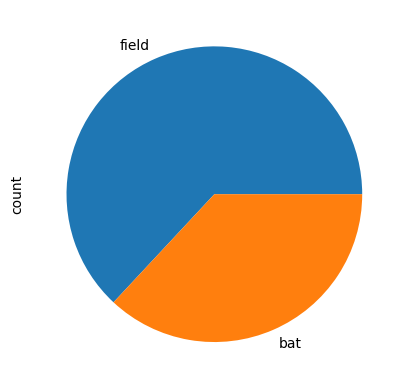

In [183]:
# toss decisionc choice pie plot
ipl["TossDecision"].value_counts().plot(kind="pie")

In [185]:
# how many matches each team has played
ipl["Team1"].value_counts() + ipl["Team2"].value_counts()

Chennai Super Kings            208
Deccan Chargers                 75
Delhi Capitals                  63
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  16
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          223
Lucknow Super Giants            15
Mumbai Indians                 231
Pune Warriors                   46
Punjab Kings                    28
Rajasthan Royals               192
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    226
Sunrisers Hyderabad            152
Name: count, dtype: int64

In [4]:
# sort_value(series and datafrrame)
# sort on te basis of one column
movies.sort_values("title_x") 

# movies.sort_values("title_x", ascending=False) # sorts in decsending order

# if column has Nan value it is put in the last
# to keep the Nan vale row up use na_positin="first"attribute
# use inplae="True" to change the original df

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [7]:
# sort on the basis of multiple column
# suppose  you first want to sort on the basis of year of movie release then sort the movies of every year in alphabatical order
movies.sort_values(["year_of_release", "title_x"])

# now i want to reverse the alphabatical order of every year
# movies.sort_values(["year_of_release", "title_x"], ascending=[True, False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN


In [16]:
# rank(series)
runs = pd.read_csv(r"Datasets_Pandas\batsman_runs_ipl.csv")
print(runs)
# runs["batsman_run"].rank() # batsman with least runs is ranked 1
runs["batsman_run"].rank(ascending=False) # batsman with most runs is ranked 1
# add this to data
runs["batting_rank"] = runs["batsman_run"].rank(ascending=False)
runs.sort_values("batting_rank")

             batter  batsman_run
0    A Ashish Reddy          280
1          A Badoni          161
2        A Chandila            4
3          A Chopra           53
4       A Choudhary           25
..              ...          ...
600      Yash Dayal            0
601   Yashpal Singh           47
602     Younis Khan            3
603    Yuvraj Singh         2754
604          Z Khan          117

[605 rows x 2 columns]


,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [17]:
# sort_index(series and dataframe)
marks = {
    "maths":67,
    "english":57,
    "science":89,
    "hindi":100
}
marks_series = pd.Series(marks)
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [18]:
marks_series.sort_index() # sort accoring to index

english     57
hindi      100
maths       67
science     89
dtype: int64

In [20]:
# set_index(dataframe) -> inplace
runs.set_index("batter") # make batter column as index
# to make it permanent use inplace=True
# runs.set_index("batter", inplace=True)

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [24]:
# reset_index(series and dataframe) -> make a index to column
marks_series.reset_index() # subject is changed from index to a column
# you can use this when you want to replace the current index column with another column
# dataframe.reset_index().set_index("another_column")

# if you apply reset_index on a series it is converted itno a dataframe

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


In [29]:
# rename(dataframe) -> to rename a title of a column

movies.rename(columns={"poster_path": "link"})

# you can also change index name
movies2 = movies.set_index("title_x") # title_x column is index
movies2.rename(index={"Uri: The Surgical Strike":"URI", "Battalion 609":"Battalion"})

,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
URI,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN


In [37]:
# unique(series) -> gives all the unique value in series
# nunique(series) -> gives no. of all the unique value in series
temp = pd.Series([1,1,2,3,3,4,4,4, np.nan, np.nan])
print(temp.unique())
print(temp.nunique()) # nunique() does not count nan

# tell how many seasons of ipl has happend
print(ipl["Season"].unique().size)
# OR 
print(ipl["Season"].nunique()) 

[ 1.  2.  3.  4. nan]
4
15
15


In [40]:
students_dict = {
    "name":["nitish","ankit","rupesh",np.nan,"mrityunjay",np.nan,"rishab",np.nan,"aditya",np.nan],
    "college":["bit","iit","vit",np.nan,np.nan,"vlsi","ssit",np.nan,np.nan,"git"],
    "branch":["eee","it","cse",np.nan,"me","ce","civ","cse","bio",np.nan],
    "cgpa":[6.66,8.25,6.41,np.nan,5.6,9,7.4,10,7.4,np.nan],
    "package":[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]
}

students = pd.DataFrame(students_dict)
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishab,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [45]:
# isnull(series and dataframe) -> checks every row andgives True for NaN
students.isnull()

,name,college,branch,cgpa,package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,True,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,True,True,False,False,False
8,False,True,False,False,True
9,True,False,True,True,True


In [46]:
# notnull(series and dataframe) -> checks every row and gives False for NaN
students.notnull()

,name,college,branch,cgpa,package
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,False,True,True,True
5,False,True,True,True,True
6,True,True,True,True,True
7,False,False,True,True,True
8,True,False,True,True,False
9,False,True,False,False,False


In [48]:
# hasnans(series) -> checks if there is NaN in series or not
students["name"].hasnans
# this is an attribute not a method

True

In [51]:
# dropna(series and dataframe) -> remove all the rows with missing values
students.dropna()
# there is a how paramenter whin is how="any" by default. means remove row with "any" nan value

# how=""
students.dropna(how="all") # removes row if "all" the values in row is nan

# subset = []
students.dropna(subset=["name"]) # remove row if name value is nan
# you can specify more than one column.(["name", "college] -> if any one thing is nan the row is dropped)

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishab,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


In [54]:
# fillna(series and dataframe)
students.fillna("unknown") # replace all nan with given value("unknown")

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,unknown,unknown,unknown,unknown,unknown
4,mrityunjay,unknown,me,5.6,6.0
5,unknown,vlsi,ce,9.0,7.0
6,rishab,ssit,civ,7.4,8.0
7,unknown,unknown,cse,10.0,9.0
8,aditya,unknown,bio,7.4,unknown
9,unknown,git,unknown,unknown,unknown


In [55]:
# it is recommended to handle filling column by column
students["package"].fillna(students["package"].mean()) # replace nan in package column by mean of packages

# there is a attribute method=""
# method="ffill"(forward fill) fill the nan with the value above it
# method="bfill"(backward fill) fill the nan with the value below it

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [60]:
# drop_duplicates(series and dataframe)
print(marks_df)
marks_df.drop_duplicates() # removes the duplicated row

# want to keep the 4th and remove the 3rd row
# use keep="last"

    iq  marks  package
0  100     80       10
1   90     70        7
2  120    100       14
3   80     70       14
4   80     70       14


,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


In [65]:
# find the last match played by virat kohli in delhi

# add a column which specifies if kohli played in the match(True or False)
ipl["all_players"] = ipl["Team1Players"] + ipl["Team2Players"]

def did_kohli_play(players_list):
    return "V Kohli" in players_list

ipl["did_kohli_played"] = ipl["all_players"].apply(did_kohli_play)

ipl[(ipl["City"] == "Delhi") & (ipl["did_kohli_played"] == True)] # all Delhi matches where kohli played 

ipl[(ipl["City"] == "Delhi") & (ipl["did_kohli_played"] == True)].drop_duplicates(subset=["City", "did_kohli_played"],keep="first") # since all row have same value for "City" AND "did_kohli_played" all are duplicate
# thus all duplicate drops and we keep the first  
# its not necessary to use drop_duplicate here we can use different approach also 


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_played
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


In [70]:
# drop(series and dataframe) -> delets rows or columns

# drop columns
print(students.drop(columns=["branch", "cgpa"])) # use inplace to delete in permanent

# drop rows
print(students.drop(index=[0,8]))

# works on custom index too
print(students.set_index("name").drop(index=["mrityunjay", "rishab"]))


         name college  package
0      nitish     bit      4.0
1       ankit     iit      5.0
2      rupesh     vit      6.0
3         NaN     NaN      NaN
4  mrityunjay     NaN      6.0
5         NaN    vlsi      7.0
6      rishab    ssit      8.0
7         NaN     NaN      9.0
8      aditya     NaN      NaN
9         NaN     git      NaN
         name college branch   cgpa  package
1       ankit     iit     it   8.25      5.0
2      rupesh     vit    cse   6.41      6.0
3         NaN     NaN    NaN    NaN      NaN
4  mrityunjay     NaN     me   5.60      6.0
5         NaN    vlsi     ce   9.00      7.0
6      rishab    ssit    civ   7.40      8.0
7         NaN     NaN    cse  10.00      9.0
9         NaN     git    NaN    NaN      NaN
       college branch   cgpa  package
name                                 
nitish     bit    eee   6.66      4.0
ankit      iit     it   8.25      5.0
rupesh     vit    cse   6.41      6.0
NaN        NaN    NaN    NaN      NaN
NaN       vlsi     ce   9.

In [71]:
# apply(series and dataframe)
# in series or columns during apply we traverse from top to bottom and apply the condition on each value
# in df you can use apply in rows(traverse rowswise)
points_df = pd.DataFrame(
    {
        "1st point":[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        "2nd point":[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)
points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [74]:
# suppose you want to add a column of euclidean value(which uses value rom col1 and col 2)
# i.e. we have to give a row in input to calculate euclidean for that row

def euclidean(row):
    pt_a = row["1st point"]
    pt_b = row["2nd point"]

    return ((pt_a[0] - pt_b[0])**2 + (pt_a[1] - pt_b[1])**2)**0.5

points_df["euclidean"] = points_df.apply(euclidean, axis=1) # axis=1  means rows

points_df

,1st point,2nd point,euclidean
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000


#### GroupBy Object in Pandas

In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv(r"Datasets_Pandas\imdb-top-1000.csv")
movies.head(1)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0


In [2]:
# in groupby we form groups in data on the basis of some column
genres = movies.groupby("Genre") # we choose categorical column from groupby
genres

In [3]:
# Applying builtin aggregation functions on groupby objects
genres.sum()
# we get a dataframe with Genre as index and sum of all the movies according to genre
# top row is sum of all the Action movies 
# we can use min, max, mean, std, mode, median, count etc

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark KnightThe Lord of the Rings: The Retu...,2008200320102001200219991980197719621954200019...,22196,1367.3,Christopher NolanPeter JacksonChristopher Nola...,Christian BaleElijah WoodLeonardo DiCaprioElij...,72282412,3.263226e+10,10499.0
Adventure,InterstellarBack to the FutureInglourious Bast...,2014198520091981196819621959201319751963194819...,9656,571.5,Christopher NolanRobert ZemeckisQuentin Tarant...,Matthew McConaugheyMichael J. FoxBrad PittJürg...,22576163,9.496922e+09,5020.0
Animation,Sen to Chihiro no kamikakushiThe Lion KingHota...,2001199419882016201820172008199719952019200920...,8166,650.3,Hayao MiyazakiRoger AllersIsao TakahataMakoto ...,Daveigh ChaseRob MinkoffTsutomu TatsumiRyûnosu...,21978630,1.463147e+10,6082.0
Biography,Schindler's ListGoodfellasHamiltonThe Intoucha...,1993199020202011200220171995198420182013201320...,11970,698.6,Steven SpielbergMartin ScorseseThomas KailOliv...,Liam NeesonRobert De NiroLin-Manuel MirandaÉri...,24006844,8.276358e+09,6023.0
Comedy,GisaengchungLa vita è bellaModern TimesCity Li...,2019199719361931200919641940200120001973196019...,17380,1224.7,Bong Joon HoRoberto BenigniCharles ChaplinChar...,Kang-ho SongRoberto BenigniCharles ChaplinChar...,27620327,1.566387e+10,9840.0
Crime,The GodfatherThe Godfather: Part II12 Angry Me...,1972197419571994200219991995199120192006199519...,13524,857.8,Francis Ford CoppolaFrancis Ford CoppolaSidney...,Marlon BrandoAl PacinoHenry FondaJohn Travolta...,33533615,8.452632e+09,6706.0
Drama,The Shawshank RedemptionFight ClubForrest Gump...,1994199919941975202019981946201420061998198819...,36049,2299.7,Frank DarabontDavid FincherRobert ZemeckisMilo...,Tim RobbinsBrad PittTom HanksJack NicholsonSur...,61367304,3.540997e+10,19208.0
Family,E.T. the Extra-TerrestrialWilly Wonka & the Ch...,19821971,215,15.6,Steven SpielbergMel Stuart,Henry ThomasGene Wilder,551221,4.391106e+08,158.0
Fantasy,Das Cabinet des Dr. CaligariNosferatu,19201922,170,16.0,Robert WieneF.W. Murnau,Werner KraussMax Schreck,146222,7.827267e+08,0.0


In [8]:
# find the top 3 genres by total earning
print(movies.groupby("Genre").sum()["Gross"].sort_values(ascending=False).head(3))

# OR

print(movies.groupby("Genre")["Gross"].sum().sort_values(ascending=False).head(3)) 

# the second approach is better -> it is fast because we are applying sum to onle required column(Gross).

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64
Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64


In [12]:
# find the genre with highest avg IMDB rating
print(genres["IMDB_Rating"].mean().sort_values(ascending=False).head(1))

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64


In [15]:
# find director with most popularity
# lets consider No_of_Votes as popularity metric

movies.groupby("Director")["No_of_Votes"].sum().sort_values(ascending=False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

In [20]:
# find the no. of movies done by each actor
movies["Star1"].value_counts() # normal method

# using groupby
movies.groupby("Star1")["Series_Title"].count() # we can use any column inplace of "Series_Title"

Star1
Aamir Khan              7
Aaron Taylor-Johnson    1
Abhay Deol              1
Abraham Attah           1
Adam Driver             1
                       ..
Zbigniew Zamachowski    1
Zooey Deschanel         1
Çetin Tekindor          1
Éric Toledano           1
Ömer Faruk Sorak        1
Name: Series_Title, Length: 660, dtype: int64

##### GroupBy Methods and Attributes

In [21]:

# METHODS
# len() -> find total number of groups
# size() -> find item in each group
# first()/last()/nth()
# get_group() vs filtering
# describe()
# sample()
# nunique()

# ATTRIBUTES
# groups

len(genres)

14

In [27]:
# size()
print(genres.size()) # no. of rows in each group


Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64


In [28]:
# first()
print(genres.first()) # first row in each group

# last()
print(genres.last()) # last row in each groupy

# nth()
print(genres.nth(5)) # nth row in each group

                              Series_Title Released_Year  Runtime  \
Genre                                                               
Action                     The Dark Knight          2008      152   
Adventure                     Interstellar          2014      169   
Animation    Sen to Chihiro no kamikakushi          2001      125   
Biography                 Schindler's List          1993      195   
Comedy                        Gisaengchung          2019      132   
Crime                        The Godfather          1972      175   
Drama             The Shawshank Redemption          1994      142   
Family          E.T. the Extra-Terrestrial          1982      115   
Fantasy       Das Cabinet des Dr. Caligari          1920       76   
Film-Noir                    The Third Man          1949      104   
Horror                              Psycho          1960      109   
Mystery                            Memento          2000      113   
Thriller                   Wait Un

In [34]:
# filtering
movies[movies["Genre"] == "Fantasy"]

# vs 

# get_group
genres.get_group("Fantasy") # returns all item in the givev group

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [35]:
# groups
genres.groups
# gives a dictionary with 
# keys = group name 
# values = list of index of all the items in that group

{'Action': [2, 5, 8, 10, 13, 14, 16, 29, 30, 31, 39, 42, 44, 55, 57, 59, 60, 63, 68, 72, 106, 109, 129, 130, 134, 140, 142, 144, 152, 155, 160, 161, 166, 168, 171, 172, 177, 181, 194, 201, 202, 216, 217, 223, 224, 236, 241, 262, 275, 294, 308, 320, 325, 326, 331, 337, 339, 340, 343, 345, 348, 351, 353, 356, 357, 362, 368, 369, 375, 376, 390, 410, 431, 436, 473, 477, 479, 482, 488, 493, 496, 502, 507, 511, 532, 535, 540, 543, 564, 569, 570, 573, 577, 582, 583, 602, 605, 608, 615, 623, ...], 'Adventure': [21, 47, 93, 110, 114, 116, 118, 137, 178, 179, 191, 193, 209, 226, 231, 247, 267, 273, 281, 300, 301, 304, 306, 323, 329, 361, 366, 377, 402, 406, 415, 426, 458, 470, 497, 498, 506, 513, 514, 537, 549, 552, 553, 566, 576, 604, 609, 618, 638, 647, 675, 681, 686, 692, 711, 713, 739, 755, 781, 797, 798, 851, 873, 884, 912, 919, 947, 957, 964, 966, 984, 991], 'Animation': [23, 43, 46, 56, 58, 61, 66, 70, 101, 135, 146, 151, 158, 170, 197, 205, 211, 213, 219, 229, 230, 242, 245, 246, 270, 33

In [36]:
# describe()
genres.describe() # applies describe on every column for every group

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [41]:
# sample()
genres.sample() # gives randomly 2 item from every group

# you can pick more tha one 
# genres.sample(2) gives error because some group do not have 2 items

# to resolve this error
# genres.sample(2, replace=True) # less tha 2 item in gro return same item twice

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
216,Rush,2013,123,Action,8.1,Ron Howard,Daniel Brühl,432811,26947624.0,74.0
566,King Kong,1933,100,Adventure,7.9,Merian C. Cooper,Ernest B. Schoedsack,78991,10000000.0,90.0
135,Klaus,2019,96,Animation,8.2,Sergio Pablos,Carlos Martínez López,104761,148596026.0,65.0
218,Spotlight,2015,129,Biography,8.1,Tom McCarthy,Mark Ruffalo,420316,45055776.0,93.0
52,City Lights,1931,87,Comedy,8.5,Charles Chaplin,Charles Chaplin,167839,19181.0,99.0
474,Nightcrawler,2014,117,Crime,7.9,Dan Gilroy,Jake Gyllenhaal,466134,32381218.0,76.0
9,Fight Club,1999,139,Drama,8.8,David Fincher,Brad Pitt,1854740,37030102.0,66.0
688,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN
456,The Maltese Falcon,1941,100,Film-Noir,8.0,John Huston,Humphrey Bogart,148928,2108060.0,96.0


In [42]:
genres.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


##### Aggrerate method

In [43]:
# agg() -> use multiple aggregating methods at same time
# passing dict
genres.agg(
    {
        "Runtime": "mean",
        "IMDB_Rating":"mean",
        "No_of_Votes":"sum",
        "Gross":"sum",
        "Metascore":"min"
    }
)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,72282412,3.263226e+10,33.0
Adventure,134.111111,7.937500,22576163,9.496922e+09,41.0
Animation,99.585366,7.930488,21978630,1.463147e+10,61.0
Biography,136.022727,7.938636,24006844,8.276358e+09,48.0
Comedy,112.129032,7.901290,27620327,1.566387e+10,45.0
Crime,126.392523,8.016822,33533615,8.452632e+09,47.0
Drama,124.737024,7.957439,61367304,3.540997e+10,28.0
Family,107.500000,7.800000,551221,4.391106e+08,67.0
Fantasy,85.000000,8.000000,146222,7.827267e+08,NaN


In [48]:
# passing list
genres.agg(["min", "max"])

Series_Title  \
                                       min   
Genre                                        
Action                                 300   
Adventure            2001: A Space Odyssey   
Animation                            Akira   
Biography                 12 Years a Slave   
Comedy                (500) Days of Summer   
Crime                         12 Angry Men   
Drama                                 1917   
Family          E.T. the Extra-Terrestrial   
Fantasy       Das Cabinet des Dr. Caligari   
Film-Noir                Shadow of a Doubt   
Horror                               Alien   
Mystery                          Dark City   
Thriller                   Wait Until Dark   
Western    Il buono, il brutto, il cattivo   

                                               Released_Year       Runtime  \
                                           max           min   max     min   
Genre                                                                        
Action                                 Yôjinbô          1924  2019      45   
Adventure                           Zombieland          1925    PG      88   
Animation          Ôkami kodomo no Ame to Yuki          1940  2020      71   
Biography                              Zerkalo          1928  2020      93   
Comedy                Zindagi Na Milegi Dobara          1921  2020      68   
Crime                        À bout de souffle          1931  2019      80   
Drama                                Zwartboek          1925  2020      64   
Family     Willy Wonka & the Chocolate Factory          1971  1982     100   
Fantasy                              Nosferatu          1920  1922      76   
Film-Noir                        The Third Man          1941  1949     100   
Horror                               The Thing          1933  2017      71   
Mystery                                Vertigo          1938  2012      96   
Thriller                       Wait Until Dark          1967  1967     108   
Western                 The Outlaw Josey Wales          1965  1976     132   

               IMDB_Rating                    Director                    \
           max         min  max                    min               max   
Genre                                                                      
Action     321         7.6  9.0       Abhishek Chaubey       Zack Snyder   
Adventure  228         7.6  8.6         Akira Kurosawa  Ömer Faruk Sorak   
Animation  137         7.6  8.6            Adam Elliot   Yoshifumi Kondô   
Biography  209         7.6  8.9             Adam McKay      Tom McCarthy   
Comedy     188         7.6  8.6  Alejandro G. Iñárritu       Zoya Akhtar   
Crime      229         7.6  9.2         Akira Kurosawa      Yavuz Turgul   
Drama      242         7.6  9.3             Aamir Khan       Çagan Irmak   
Family     115         7.8  7.8             Mel Stuart  Steven Spielberg   
Fantasy     94         7.9  8.1            F.W. Murnau      Robert Wiene   
Film-Noir  108         7.8  8.1       Alfred Hitchcock       John Huston   
Horror     122         7.6  8.5     Alejandro Amenábar  William Friedkin   
Mystery    138         7.6  8.4            Alex Proyas     Terry Gilliam   
Thriller   108         7.8  7.8          Terence Young     Terence Young   
Western    165         7.8  8.8         Clint Eastwood      Sergio Leone   

                              Star1                   No_of_Votes           \
                                min               max         min      max   
Genre                                                                        
Action                   Aamir Khan      Yun-Fat Chow       25312  2303232   
Adventure                Aamir Khan      Yves Montand       29999  1512360   
Animation             Adrian Molina      Yôji Matsuda       25229   999790   
Biography              Adrien Brody     Éric Toledano       27254  1213505   
Comedy                   Aamir Khan  Ömer Faruk Sorak       26337   939631   
Cri

In [49]:
# merging both the above syntax
genres.agg(
    {
        "Runtime":["min", "mean","max"],
        "IMDB_Rating":["min", "mean","max"]
    }
)

Runtime                  IMDB_Rating               
              min        mean  max         min      mean  max
Genre                                                        
Action         45  129.046512  321         7.6  7.949419  9.0
Adventure      88  134.111111  228         7.6  7.937500  8.6
Animation      71   99.585366  137         7.6  7.930488  8.6
Biography      93  136.022727  209         7.6  7.938636  8.9
Comedy         68  112.129032  188         7.6  7.901290  8.6
Crime          80  126.392523  229         7.6  8.016822  9.2
Drama          64  124.737024  242         7.6  7.957439  9.3
Family        100  107.500000  115         7.8  7.800000  7.8
Fantasy        76   85.000000   94         7.9  8.000000  8.1
Film-Noir     100  104.000000  108         7.8  7.966667  8.1
Horror         71  102.090909  122         7.6  7.909091  8.5
Mystery        96  119.083333  138         7.6  7.975000  8.4
Thriller      108  108.000000  108         7.8  7.800000  7.8
Western       132  148.250000  165         7.8  8.350000  8.8

##### Looping on groups

In [51]:
for group, data in genres:
    print(type(group), type(data))

# group in the name of group 
# data is the dataframe in that group

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>


In [69]:
# find the highest rated movie of each genre
df = pd.DataFrame(columns=movies.columns)
for group, data in genres:
    df = pd.concat([ df, data[data["IMDB_Rating"] == data["IMDB_Rating"].max()] ])
df

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_25528\2890149225.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([ df, data[data["IMDB_Rating"] == data["IMDB_Rating"].max()] ])


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
21,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
23,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
7,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
19,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
26,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247.0,59.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
688,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
698,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0


In [74]:
# split (apply) combine
# when we use apply on groupby object it send each group on by ony throug the function defined in apply

# find number of movies startin wih A for every group 
def start_with_A(group):
    return group["Series_Title"].str.startswith("A").sum()
    
genres.apply(start_with_A)

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_25528\667641879.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(start_with_A)


Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

In [75]:
# find ranking of each movie in the group according to IMDB score

def rank_movie(group):
    group["genre_rank"] = group["IMDB_Rating"].rank(ascending=False)
    return group

genres.apply(rank_movie)

C:\Users\utkarsh.alpuria\AppData\Local\Temp\ipykernel_25528\1997802102.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(rank_movie)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              genre_rank  
Genre                     
Action   2           1.0  
         5           2.0  
         8           3.5  
         10          3.5  
         13          6.0  
...                  ...  
Thriller 700         1.0  
Western  12          1.0  
         48          2.0  
         115         3.0  
         691         4.0  

[1000 rows x 11 columns]

##### GroupBy on multiple columns

In [77]:
# suppose we want to create a actor and director combo

duo = movies.groupby(["Director", "Star1"])
duo.size()

Director             Star1         
Aamir Khan           Amole Gupte       1
Aaron Sorkin         Eddie Redmayne    1
Abdellatif Kechiche  Léa Seydoux       1
Abhishek Chaubey     Shahid Kapoor     1
Abhishek Kapoor      Amit Sadh         1
                                      ..
Zaza Urushadze       Lembit Ulfsak     1
Zoya Akhtar          Hrithik Roshan    1
                     Vijay Varma       1
Çagan Irmak          Çetin Tekindor    1
Ömer Faruk Sorak     Cem Yilmaz        1
Length: 898, dtype: int64

In [81]:
# find which actor director duo has most earning
duo["Gross"].sum().sort_values(ascending=False).head(1)

Director        Star1         
Akira Kurosawa  Toshirô Mifune    2.999877e+09
Name: Gross, dtype: float64

In [88]:
# find the average metascore of actor in different genre
movies.groupby(["Star1", "Genre"])["Metascore"].mean()

Star1                 Genre    
Aamir Khan            Action        NaN
                      Adventure    84.0
                      Comedy       67.0
Aaron Taylor-Johnson  Action       66.0
Abhay Deol            Drama         NaN
                                   ... 
Zbigniew Zamachowski  Comedy       88.0
Zooey Deschanel       Comedy       76.0
Çetin Tekindor        Drama         NaN
Éric Toledano         Biography    57.0
Ömer Faruk Sorak      Comedy        NaN
Name: Metascore, Length: 829, dtype: float64